## Visualizing data seperation

In this notebook, we will analyse the iris datasets, and demonstrate the seperation of the different classes using two methods. 

The first method is based on the calculse of the inter distance of each class and intra distance between two classes. To calculate distance, we will use two metrics, the first is the Euclidean distance and the second is the Mahalanobis distance. 

The second method is based on visualization techniques including histograms and scatter plots.


In [1]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [2]:
iris_data = pd.read_csv('iris.csv')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
list(iris_data['species'].unique())

['setosa', 'versicolor', 'virginica']

In [5]:
iris_data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
iris_data_setosa=iris_data.loc[np.where(iris_data['species']=='setosa')].reset_index(drop=True)
iris_data_versicolor=iris_data.loc[np.where(iris_data['species']=='versicolor')].reset_index(drop=True)
iris_data_virginica=iris_data.loc[np.where(iris_data['species']=='virginica')].reset_index(drop=True)

In [7]:
iris_data_setosa.drop('species', inplace=True, axis=1)
iris_data_versicolor.drop('species', inplace=True, axis=1)
iris_data_virginica.drop('species', inplace=True, axis=1)

In [8]:
iris_data_setosa.tail()

,sepal_length,sepal_width,petal_length,petal_width
45,4.8,3.0,1.4,0.3
46,5.1,3.8,1.6,0.2
47,4.6,3.2,1.4,0.2
48,5.3,3.7,1.5,0.2
49,5.0,3.3,1.4,0.2


## Euclidean distance

### Intra distance

In [9]:
def intra_Euclidean_distance(data):
    mean_list = list(data.mean(axis=0))
    iris_intra =list()
    for i in range(np.shape(data)[0]):
        s = 0
        for j in range(len(mean_list)-1):
            d= data[i:i+1].values.flatten().tolist()
            s = s + np.square(d[j] - mean_list[j])

        iris_intra.append(np.sqrt(s))
    return max(iris_intra), iris_intra.index(max(iris_intra))

In [10]:
max_intra, index_intra = intra_Euclidean_distance(iris_data_setosa)
max_intra, index_intra

(1.2468616603296454, 41)

In [11]:
max_intra, index_intra = intra_Euclidean_distance(iris_data_versicolor)
max_intra, index_intra

(1.5360325517384064, 48)

In [12]:
max_intra, index_intra = intra_Euclidean_distance(iris_data_virginica)
max_intra, index_intra

(2.0446818823474704, 6)

### Inter distance

In [13]:
def inter_Euclidean_distance(datacenter, todata):
    mean_list=list(datacenter.mean(axis=0))
    iris_inter=list()
    for i in range(np.shape(todata)[0]):
        s = 0
        for j in range(len(mean_list)-1):
            d=todata[i:i+1].values.flatten().tolist()
            s = s + np.square(d[j] - mean_list[j])

        iris_inter.append(np.sqrt(s))
    return min(iris_inter), iris_inter.index(min(iris_inter))

In [14]:
max_inter, index_inter = inter_Euclidean_distance(iris_data_setosa, iris_data_versicolor)
max_inter, index_inter

(1.7987395586910293, 48)

In [15]:
tab = []
data = [iris_data_setosa, iris_data_versicolor, iris_data_virginica]
classe_1 = [intra_Euclidean_distance(data[0])[0], inter_Euclidean_distance(data[0],data[1])[0], inter_Euclidean_distance(data[0],data[2])[0]]
classe_2 = [inter_Euclidean_distance(data[1],data[0])[0], intra_Euclidean_distance(data[1])[0], inter_Euclidean_distance(data[1],data[2])[0]]
classe_3 = [inter_Euclidean_distance(data[2],data[0])[0], inter_Euclidean_distance(data[2],data[1])[0], intra_Euclidean_distance(data[2])[0]]
tab = [i for i in [classe_1, classe_2, classe_3]]
tab

[[1.2468616603296454, 1.7987395586910293, 3.1783429645021],
 [2.6903152231662366, 1.5360325517384064, 0.5904201893566986],
 [4.029084759594913, 0.5638474971124736, 2.0446818823474704]]

In [16]:
inter_Euclidean_distance(iris_data_versicolor,iris_data_virginica)

(0.5904201893566986, 38)

In [17]:
index = list(iris_data["species"].unique())
columns = index
df = pd.DataFrame(data=tab,index=index,columns=columns)
df

,setosa,versicolor,virginica
setosa,1.246862,1.798740,3.178343
versicolor,2.690315,1.536033,0.590420
virginica,4.029085,0.563847,2.044682


# Mahalanobis distance

In [18]:
iris_array = iris_data_setosa.to_numpy()
iris_array

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
iris_array = np.transpose(iris_array)
sigma = np.cov(iris_array.astype(float), bias=False)
sigmainv = np.linalg.inv(sigma)
sigmainv

array([[ 18.94343879, -12.40482616,  -4.50020654,  -4.77612733],
       [-12.40482616,  15.57054017,   1.11107914,  -2.10409783],
       [ -4.50020654,   1.11107914,  38.77620413, -17.9350353 ],
       [ -4.77612733,  -2.10409783, -17.9350353 , 106.04590614]])

In [20]:
def intra_mahalanobis_distance(data):
    mean_list = list(data.mean(axis=0))
    iris_intra =list()
    for i in range(np.shape(data)[0]):
      v = data[i:i+1].values.flatten().tolist()
      diff = [ a - b for (a,b) in zip (v, mean_list)]
      p = np.dot(np.transpose(diff), sigmainv)
      dist = np.sqrt(np.dot(p, diff))
      iris_intra.append(dist)
    return max(iris_intra), iris_intra.index(max(iris_intra))

In [21]:
intra_mahalanobis_distance(iris_data_setosa)

(3.511073719522498, 41)

In [22]:
def inter_mahalanobis_distance(datacenter, todata):
  mean_list = list(datacenter.mean(axis=0))
  iris_inter =list()
  for i in range(np.shape(todata)[0]):
    v = todata[i:i+1].values.flatten().tolist()
    diff = [ a - b for (a,b) in zip (v, mean_list)]
    p = np.dot(np.transpose(diff), sigmainv)
    dist = np.sqrt(np.dot(p, diff))
    iris_inter.append(dist)
  return max(iris_inter), iris_inter.index(max(iris_inter))


In [23]:
inter_mahalanobis_distance(iris_data_setosa, iris_data_versicolor)

(22.9937237280742, 33)

In [24]:
tab = []
data = [iris_data_setosa, iris_data_versicolor, iris_data_virginica]
classe_1 = [intra_mahalanobis_distance(data[0])[0], inter_mahalanobis_distance(data[0],data[1])[0], inter_mahalanobis_distance(data[0],data[2])[0]]
classe_2 = [inter_mahalanobis_distance(data[1],data[0])[0], intra_mahalanobis_distance(data[1])[0], inter_mahalanobis_distance(data[1],data[2])[0]]
classe_3 = [inter_mahalanobis_distance(data[2],data[0])[0], inter_mahalanobis_distance(data[2],data[1])[0], intra_mahalanobis_distance(data[2])[0]]

tab = [i for i in [classe_1, classe_2, classe_3]]
tab

[[3.511073719522498, 22.9937237280742, 34.77593204799416],
 [20.767294151268608, 7.3994220423368775, 16.936113944357583],
 [29.20796091675913, 15.496698813863535, 9.165296822397028]]

In [25]:
index = list(iris_data["species"].unique())
columns = index
df = pd.DataFrame(data=tab,index=index,columns=columns)
df

,setosa,versicolor,virginica
setosa,3.511074,22.993724,34.775932
versicolor,20.767294,7.399422,16.936114
virginica,29.207961,15.496699,9.165297


# Histogram visualization

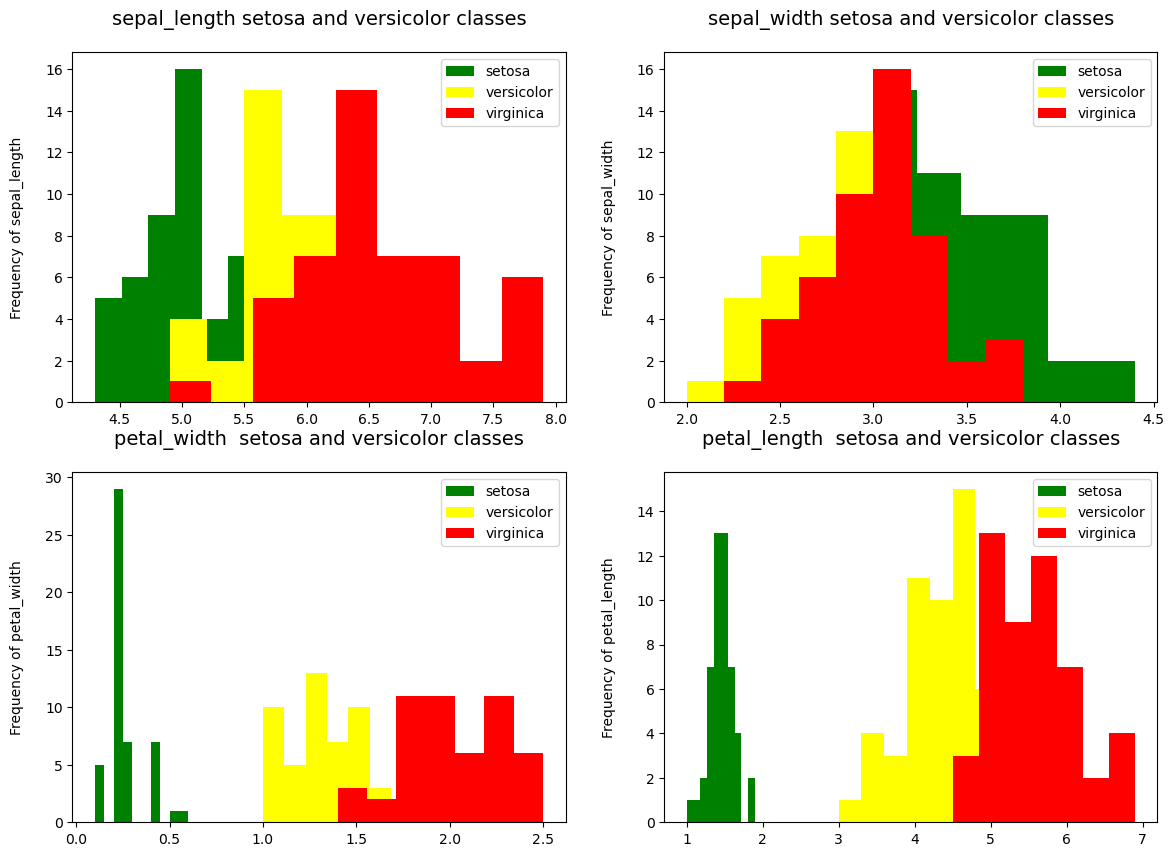

In [26]:
fig=plt.figure(4,figsize=(14,10))

plt.subplot(2,2,1)
plt.hist(iris_data_setosa['sepal_length'], bins='auto',  label='setosa',color='green')
plt.hist(iris_data_versicolor['sepal_length'], bins='auto', label='versicolor', color='yellow')
plt.hist(iris_data_virginica['sepal_length'], bins='auto', label='virginica', color='red')
plt.legend(loc='upper right')
plt.ylabel('Frequency of sepal_length', labelpad=15)
plt.title('sepal_length setosa and versicolor classes', fontsize=14, pad=20)

plt.subplot(2,2,2)
plt.hist(iris_data_setosa['sepal_width'], bins='auto',  label='setosa',color='green')
plt.hist(iris_data_versicolor['sepal_width'], bins='auto', label='versicolor', color='yellow')
plt.hist(iris_data_virginica['sepal_width'], bins='auto', label='virginica', color='red')
plt.legend(loc='upper right')
plt.ylabel('Frequency of sepal_width', labelpad=15)
plt.title('sepal_width setosa and versicolor classes', fontsize=14, pad=20)

plt.subplot(2,2,3)
plt.hist(iris_data_setosa['petal_width'], bins='auto',  label='setosa',color='green')
plt.hist(iris_data_versicolor['petal_width'], bins='auto', label='versicolor', color='yellow')
plt.hist(iris_data_virginica['petal_width'], bins='auto', label='virginica', color='red')
plt.legend(loc='upper right')
plt.ylabel('Frequency of petal_width', labelpad=15)
plt.title('petal_width  setosa and versicolor classes', fontsize=14, pad=20)

plt.subplot(2,2,4)
plt.hist(iris_data_setosa['petal_length'], bins='auto',  label='setosa',color='green')
plt.hist(iris_data_versicolor['petal_length'], bins='auto', label='versicolor', color='yellow')
plt.hist(iris_data_virginica['petal_length'], bins='auto', label='virginica', color='red')
plt.legend(loc='upper right')
plt.ylabel('Frequency of petal_length', labelpad=15)
plt.title('petal_length  setosa and versicolor classes', fontsize=14, pad=20)

plt.show()

# Scatter plots

In [27]:
label_encoder = LabelEncoder()
iris_data_num=iris_data.copy()
iris_data_num['species']=label_encoder.fit_transform(iris_data_num['species'])

In [28]:
iris_data_setosa=iris_data_num.loc[np.where(iris_data_num['species']==0)].reset_index(drop=True)
iris_data_versicolor=iris_data_num.loc[np.where(iris_data_num['species']==1)].reset_index(drop=True)
iris_data_virginica=iris_data_num.loc[np.where(iris_data_num['species']==2)].reset_index(drop=True)

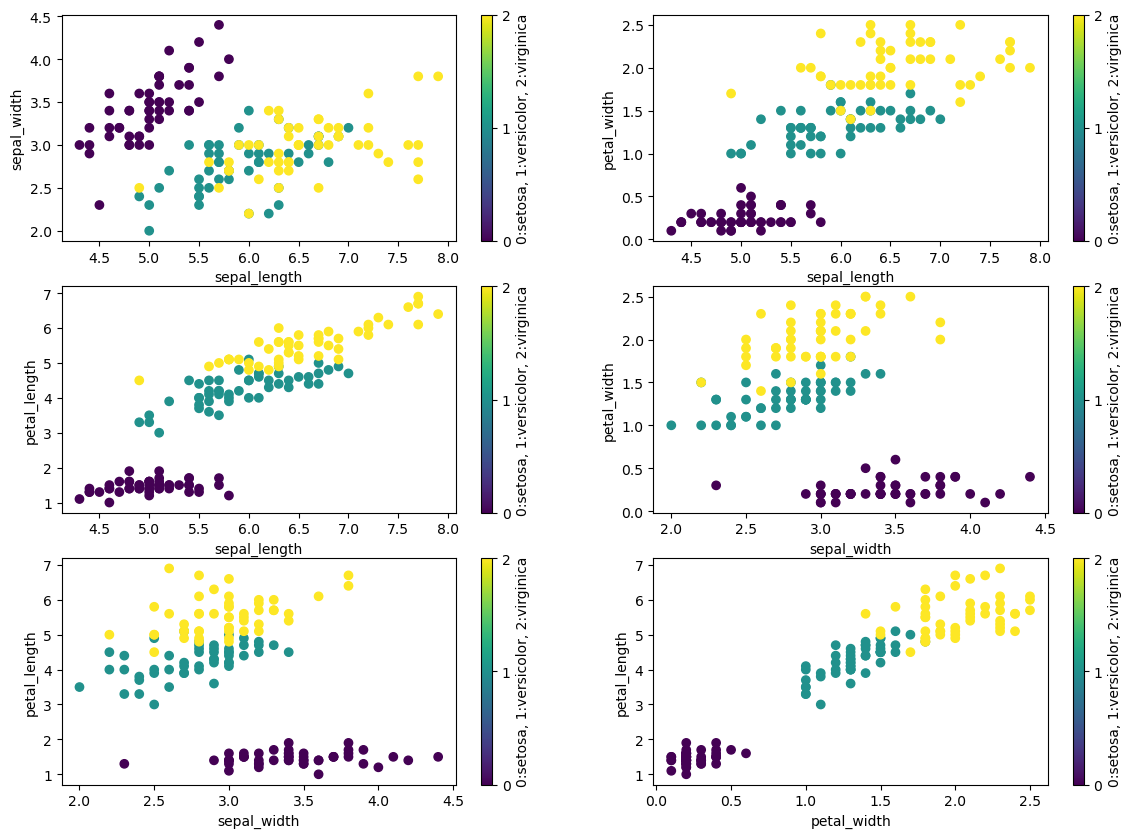

In [29]:
fig=plt.figure(6,figsize=(14,10))

plt.subplot(3,2,1)
plt.scatter(iris_data_num['sepal_length'], iris_data_num['sepal_width'], c=iris_data_num['species'])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.colorbar(ticks=[0,1, 2], label='0:setosa, 1:versicolor, 2:virginica')

plt.subplot(3,2,2)
plt.scatter(iris_data_num['sepal_length'], iris_data_num['petal_width'], c=iris_data_num['species'])
plt.xlabel('sepal_length')
plt.ylabel('petal_width')
plt.colorbar(ticks=[0,1, 2], label='0:setosa, 1:versicolor, 2:virginica')

plt.subplot(3,2,3)
plt.scatter(iris_data_num['sepal_length'], iris_data_num['petal_length'], c=iris_data_num['species'])
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.colorbar(ticks=[0,1, 2], label='0:setosa, 1:versicolor, 2:virginica')

plt.subplot(3,2,4)
plt.scatter(iris_data_num['sepal_width'], iris_data_num['petal_width'], c=iris_data_num['species'])
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.colorbar(ticks=[0,1, 2], label='0:setosa, 1:versicolor, 2:virginica')


plt.subplot(3,2,5)
plt.scatter(iris_data_num['sepal_width'], iris_data_num['petal_length'], c=iris_data_num['species'])
plt.xlabel('sepal_width')
plt.ylabel('petal_length')
plt.colorbar(ticks=[0,1, 2], label='0:setosa, 1:versicolor, 2:virginica')

plt.subplot(3,2,6)
plt.scatter(iris_data_num['petal_width'], iris_data_num['petal_length'], c=iris_data_num['species'])
plt.xlabel('petal_width')
plt.ylabel('petal_length')
plt.colorbar(ticks=[0,1, 2], label='0:setosa, 1:versicolor, 2:virginica')


plt.show()

In [30]:
iris_features = iris_data_num[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
pca = PCA(n_components=2)
#iris_features= iris_data_num[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
pca.fit(iris_features)
iris_features = pca.transform(iris_features)
principalDf = pd.DataFrame(data = iris_features, columns = ['principal component 1', 'principal component 2'])

In [31]:
principalDf

,principal component 1,principal component 2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


In [32]:
finalDf = pd.concat([principalDf, iris_data[['species']]], axis = 1)
finalDf

,principal component 1,principal component 2,species
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa
...,...,...,...
145,1.944110,0.187532,virginica
146,1.527167,-0.375317,virginica
147,1.764346,0.078859,virginica
148,1.900942,0.116628,virginica


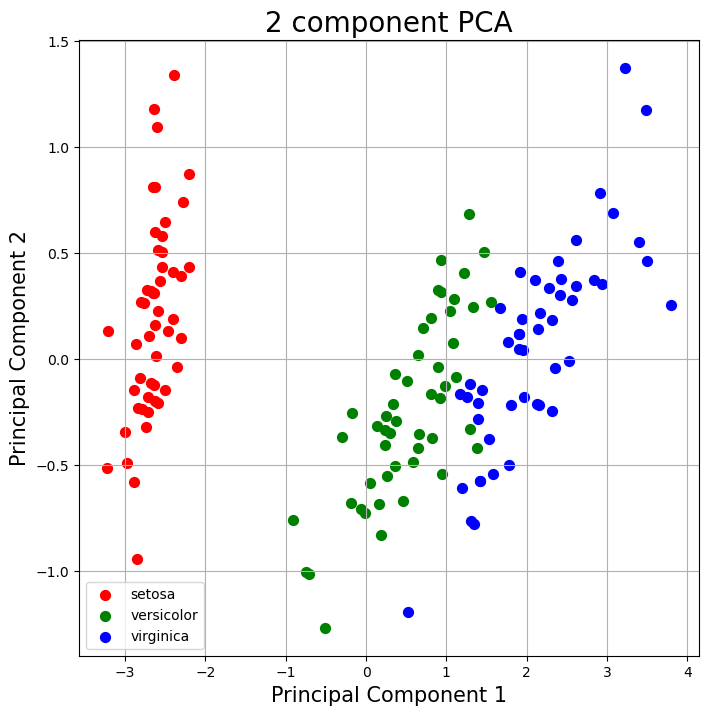

In [33]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()